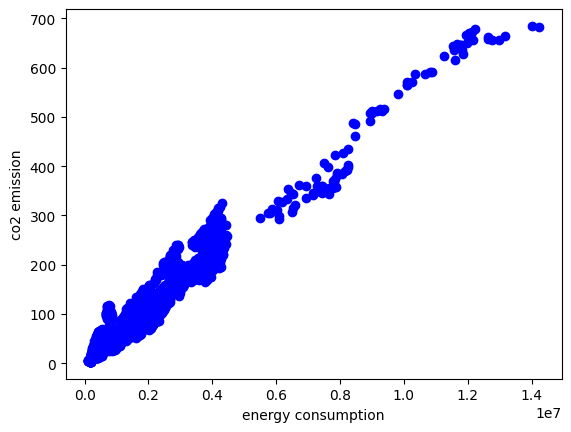

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

co2emission = pd.read_csv("D:/Anitha/Graduate/Courses/GradProject/CPSC597/Data/Data1/CO2History.csv")
plt.scatter(co2emission['Energy'], co2emission['CO2'], color='blue')
plt.xlabel('energy consumption')
plt.ylabel('co2 emission')
plt.show()

In [2]:
data = np.random.rand(len(co2emission)) < 0.8
train = co2emission[data]
test = co2emission[~data]
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Energy']])
train_y = np.asanyarray(train[['CO2']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[5.34043025e-05]]
Intercept:  [8.93863755]


Text(0, 0.5, 'CO2')

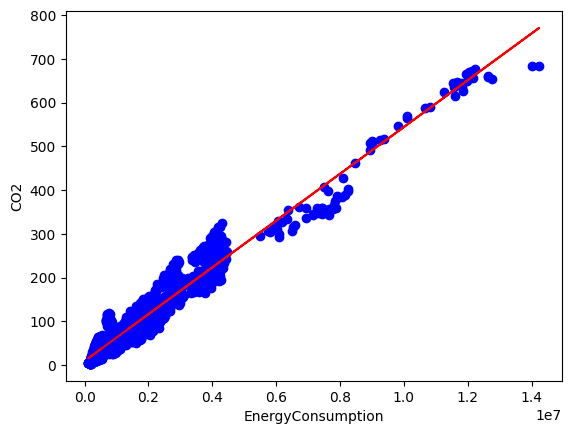

In [4]:
plt.scatter(train.Energy, train.CO2,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'red')
plt.xlabel("EnergyConsumption")
plt.ylabel("CO2")

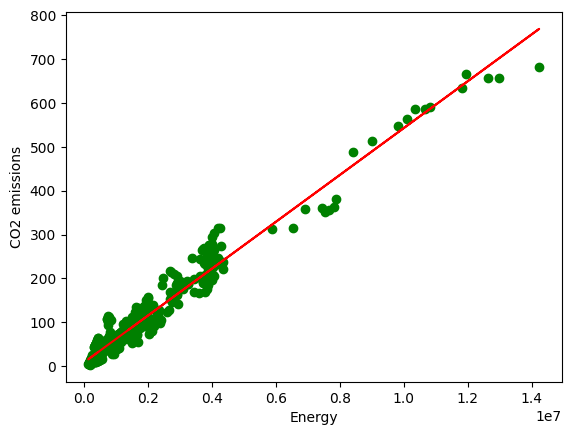

In [3]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Energy']])
test_y = np.asanyarray(test[['CO2']])
#predict CO2
test_y_pred = regr.predict(test_x)
# print linear regression line on our TEST dataset
plt.scatter(test_x, test_y, color='green')
plt.plot(test_x, regr.coef_[0][0]*test_x + regr.intercept_[0], '-r')
plt.ylabel('CO2 emissions')
plt.xlabel('Energy')
plt.show()


In [4]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print("Mean squared error (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_pred , test_y) )
# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % regr.score(test_x, test_y))

Mean absolute error: 15.71
Mean squared error (MSE): 477.54
R2-score: 0.96
Explained Variance score: 0.96


In [3]:
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': test_y_pred.flatten()})
df

,Actual,Predicted
0,106.600000,96.666676
1,134.100000,113.675002
2,119.200000,111.580163
3,13.400000,20.489717
4,17.000000,23.982133
...,...,...
512,42.138123,26.630760
513,63.474778,31.906455
514,64.420577,33.129154
515,66.831137,37.033968


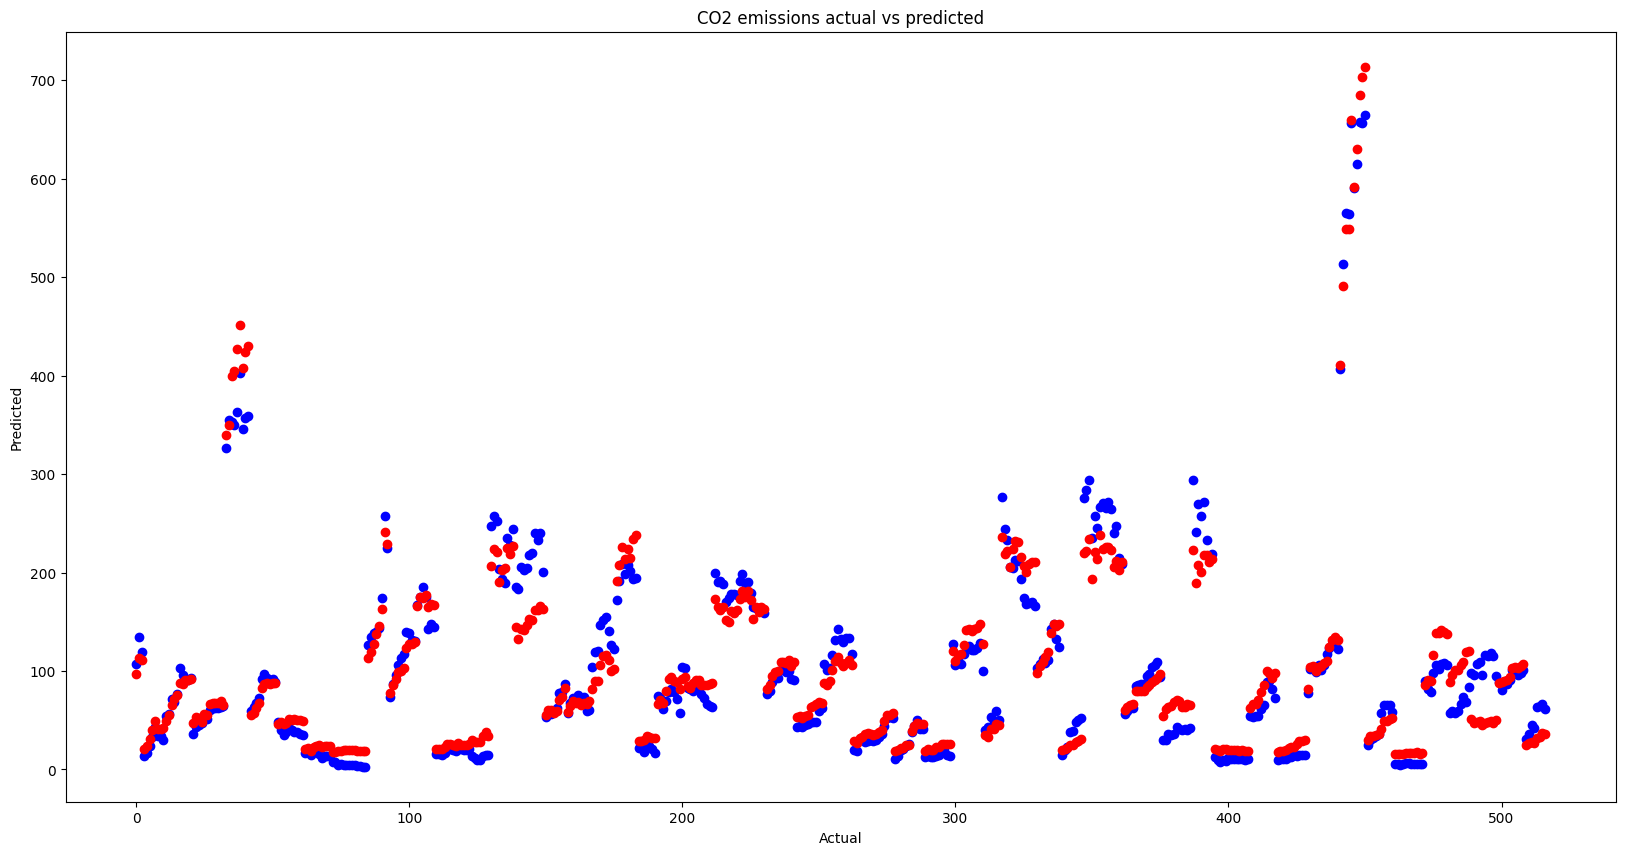

In [4]:
plt.figure(figsize=(20,10))
plt.title('CO2 emissions actual vs predicted')
plt.scatter(range(len(test_y)), test_y, color='blue')
plt.scatter(range(len(test_y_pred)), test_y_pred, color='red')
plt.show()